### TxTrack  
####  Texas High-Frequency Radar Particle Tracking 


In [3]:
!git clone https://github.com/cyhsu/leaflet.timedimention.trajectory.git

fatal: destination path 'leaflet.timedimention.trajectory' already exists and is not an empty directory.


In [4]:
cd leaflet\.timedimention\.trajectory/


/content/leaflet.timedimention.trajectory


In [5]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [6]:
pip install -r requirements.txt

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from src.api.fetch import fetch


In [8]:
start_time = '2018-07-01'
end_time  = '2018-07-03'
cls = fetch(-94.88, 29.11,start_time,end_time)
json01 = cls.json()[0]
print(json01.keys())

			 Retrieve Dataset from UCSD HFRadar threddsURL

			 Load the entire dataset
dict_keys(['type', 'geometry', 'properties'])


In [9]:
lon,lat = np.squeeze(json01['geometry']['coordinates']).T
print(lat)

[29.11       29.11175539 29.11455646 29.11792518 29.12198131 29.12477352
 29.12828813 29.13382838 29.14017884 29.14659475 29.1533146  29.158406
 29.16342819 29.16550622 29.16826981 29.17255386 29.17752943 29.18224959
 29.18683113 29.18998498 29.19189551 29.19426105 29.19472475 29.19466766
 29.19392181 29.19254125 29.19044095 29.19004424 29.19020526 29.19069655
 29.1922163  29.19402966 29.19611067 29.19799131 29.1996225  29.20066722
 29.20196664 29.2038901  29.20575933 29.20756069 29.20909113 29.21017667
 29.21120639 29.21193051 29.21184076 29.2115025  29.21183857 29.21261509
 29.21311591 29.21296065 29.21174046 29.20989061 29.2081496  29.20672511
 29.20548622 29.20500237 29.20526519 29.20699981 29.20891426 29.21109258
 29.21245912 29.21327631 29.21392419 29.21401763 29.21343928 29.21239682
 29.21187178 29.21087177 29.21000677 29.21022799 29.21069965 29.21077892]


/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


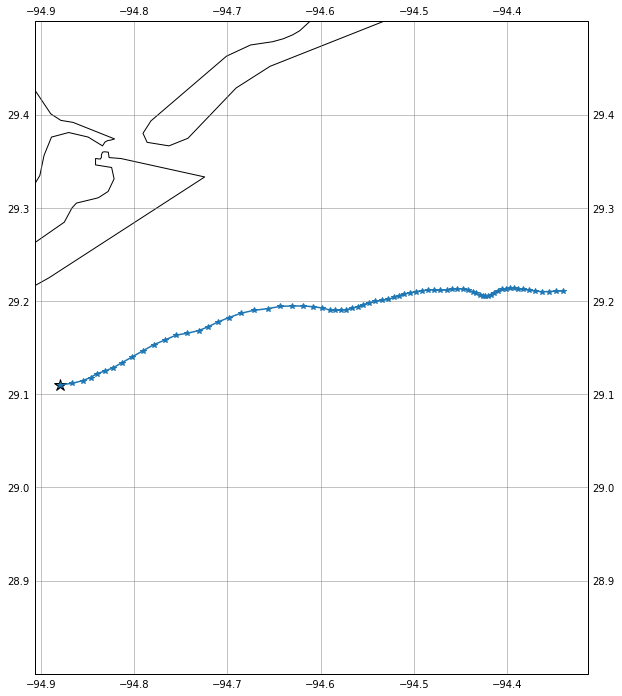

In [17]:
fig, axes = plt.subplots(ncols=1,nrows=1,
                         figsize=(15,12),
                         subplot_kw=dict(projection=ccrs.PlateCarree()))
extent = [-99.0, -90.0, 25.0, 30.0]
# axes.set_extent(extent)
# axes.add_feature(cf.LAND(scale='10m'))
# axes.add_feature(cf.OCEAN)  
axes.add_feature(cf.STATES, linestyle='-',lw=1.0,edgecolor='white')  
axes.add_feature(cf.BORDERS, linestyle='-', lw=2.5,edgecolor='white')  
axes.gridlines(color='gray',alpha=0.6,draw_labels=True) 
axes.coastlines(resolution='10m')
axes.plot(lon[0],lat[0],'k*',markersize=12)
axes.plot(lon,lat,'*-')
axes.set_ylim([28.8,29.5])
# axes.set_xlim([-99])
# axes.set_extent([-99, -93, 25, 30],crs=ccrs.PlateCarree())

plt.show()

In [0]:
cf.LAND?